# Лабораторна робота №3. Байєсівський класифікатор.

### Виконала студентка групи КМ-01мн Григоренко Анастасія 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
a = ['x'+str(i) for i in range(12)]
a.append('y')
df = pd.read_csv('MN-03-Grigorenko3.csv', sep = ';',
                names= a,
                index_col=None)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,x,s,n,t,p,c,n,k,e,s,k,u,poisonous
1,x,s,y,t,a,c,b,k,e,s,n,g,edible
2,b,s,w,t,l,c,b,n,e,s,n,m,edible
3,x,y,w,t,p,c,n,n,e,s,k,u,poisonous
4,x,s,g,f,n,w,b,k,t,s,n,g,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,x,s,w,t,l,c,b,w,e,s,n,g,edible
246,x,s,w,t,l,w,n,p,t,s,u,d,edible
247,x,y,w,t,a,c,b,n,e,s,k,m,edible
248,f,y,y,t,l,c,b,w,e,y,k,p,edible


In [116]:
split = np.random.rand(250) < 0.5
train = df[split]
test = df[~split]

In [117]:
df_pois = train[train['y'] == 'poisonous']
df_edib = train[train['y'] == 'edible']

In [124]:
p = len(df_pois)/len(df)
e = len(df_edib)/len(df)

In [125]:
features = df.columns
answers = []
for _, row in test.iterrows():
    counter_pois = 1
    for i, j in zip(row, features):
        prob_x = len(df_pois[df_pois[j]==i])/len(df_pois)
        counter_pois *= prob_x
    prob_pois = counter_pois*p
    
    counter_edib = 1
    for i, j in zip(row, features):
        prob_x = len(df_edib[df_edib[j]==i])/len(df_edib)
        counter_edib *= prob_x
    prob_edib = counter_edib*e
    if prob_pois > prob_edib:
        answer = 'poisonous'
    else:
        answer = 'edible'
    answers.append(answer)

In [126]:
test['class'] = answers
test

C:\Users\Nastya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y,class
1,x,s,y,t,a,c,b,k,e,s,n,g,edible,edible
2,b,s,w,t,l,c,b,n,e,s,n,m,edible,edible
3,x,y,w,t,p,c,n,n,e,s,k,u,poisonous,poisonous
5,x,y,y,t,a,c,b,n,e,s,k,g,edible,edible
9,b,s,y,t,a,c,b,g,e,s,k,m,edible,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,f,y,y,t,a,c,b,p,e,y,k,p,edible,edible
240,f,y,y,t,a,c,b,w,e,y,k,p,edible,edible
244,f,f,w,t,a,w,n,p,t,s,u,d,edible,edible
247,x,y,w,t,a,c,b,n,e,s,k,m,edible,edible


Перевірка якості роботи збудованого класифікатора:

In [112]:
accuracy = len(test[test['y'] == test['class']])/len(test)
accuracy

1.0

Графічне представлення результатів:

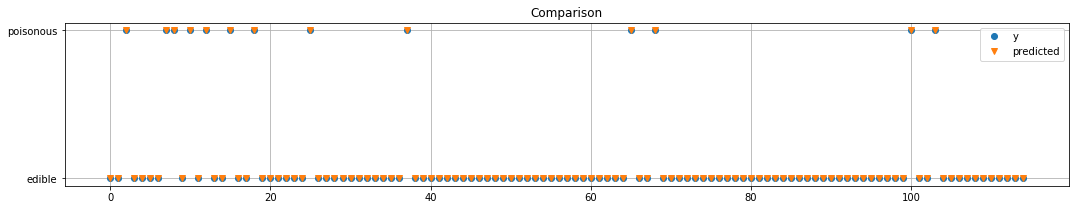

In [137]:
fig, ax = plt.subplots()
ax.plot(range(len(test)), test['y'], 'o', label='y')
ax.plot(range(len(test)), test['class'], 'v', label='predicted')
fig.set_size_inches(18, 3)
plt.legend()
ax.grid()
ax.set_title('Comparison')
plt.show()